In [1]:
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt

In [2]:
filename = 'data/ex2data1.txt'
data = np.loadtxt(filename, delimiter=',')

X = data[:, :2]
y = data[:, 2]

In [3]:
def plot_data(X, y):
    pos = y == 1; neg = y == 0;
    plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='+')
    plt.scatter(X[neg, 0], X[neg, 1], c='r', marker='x')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend(['Admitted', 'Not Admitted'], loc='best')
    
def plot_decision_boundary(theta, X, y):
    plot_x = np.array([np.min(X[:, 1]), np.max(X[:, 1])])

    plot_y = (-1 / theta[2]) * (theta[2] * plot_x + theta[0]) 
    plot_y = (-theta[0] - theta[2] * plot_x) / theta[1]

    plot_data(X[:, 1:], y)
    plt.plot(plot_x, plot_y);
    plt.legend(['Decision Boundary', "Admitted", "Not Admitted"], loc='best');    

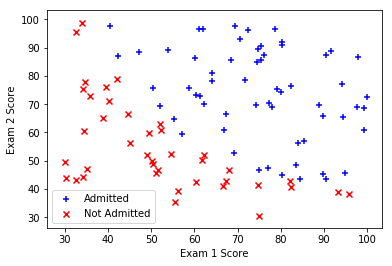

In [4]:
plot_data(X, y)

In [5]:
def sigmoid(Z=0):
    return 1 / (1 + np.exp(-Z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    return -(1 / m) * np.sum(np.dot(np.log(h), y) + np.dot(np.log(1 - h), 1 - y))

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    return (X.T.dot(h - y)) / m

def optimize_theta(theta, X, y, lamda=0.):
    result = optimize.fmin_bfgs(cost_function, theta, fprime=gradient,
                           args=(X, y), maxiter=400, full_output=True)
    
    return result[0], result[1]

In [6]:
m, n = X.shape
X = np.hstack((np.ones((m, 1)), X)) # Adding bias.

In [7]:
class LogisticRegression:
    
    def __init__(self, bfgs=True, lr=0.01, n_iter=400):
        
        self.bfgs = bfgs
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        if self.bfgs:
            self.theta, _ = optimize_theta(theta, X, y)
        else:
            self.theta = np.copy(theta)
            for i in range(self.n_iter):                
                # cost = cost_function(theta, X, y)
                grad = gradient(self.theta, X, y)
                self.theta -= self.lr * grad

    def predict(self, X):
        return np.round(sigmoid(X.dot(self.theta)))

In [8]:
lr = LogisticRegression(bfgs=True)
lr.fit(X, y)
preds = lr.predict(X)

print("Accuracy: ", (preds == y).mean())

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Accuracy:  0.89


/home/alperen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


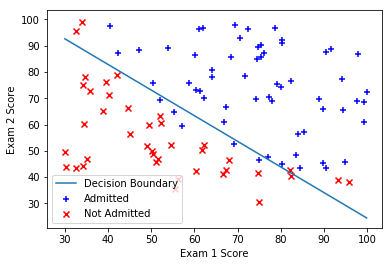

In [9]:
plot_decision_boundary(lr.theta, X, y)

In [10]:
# Sklearn way
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
preds = lr.predict(X)

print("Accuracy: ", (preds == y).mean())

Accuracy:  0.91
